In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [19]:
df = pd.read_csv(r'C:\Users\Aria\Downloads\movies.csv')

In [20]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [21]:
#Check for missing values

for col in df.columns:
    missing_pct = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_pct))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [22]:
#There is missmatching between the year in the release date col. and the year col, so we gonna fix that 

df['correct_year'] = df['year'].astype(str).str[:4]

In [23]:
#getting rids of the .0's

df['budget'] = df['budget'].fillna(0).astype('int64')

In [24]:
df['votes'] = df['votes'].fillna(0).astype('int64')

In [25]:
df['gross'] = df['gross'].fillna(0).astype('int64')

In [26]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [27]:
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [28]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1989
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1989


In [29]:
tot = df.isna().sum()
print(f'Total number of null values : {tot.sum()}')

Total number of null values : 110


In [30]:
df = df.dropna()

Text(0, 0.5, 'budget')

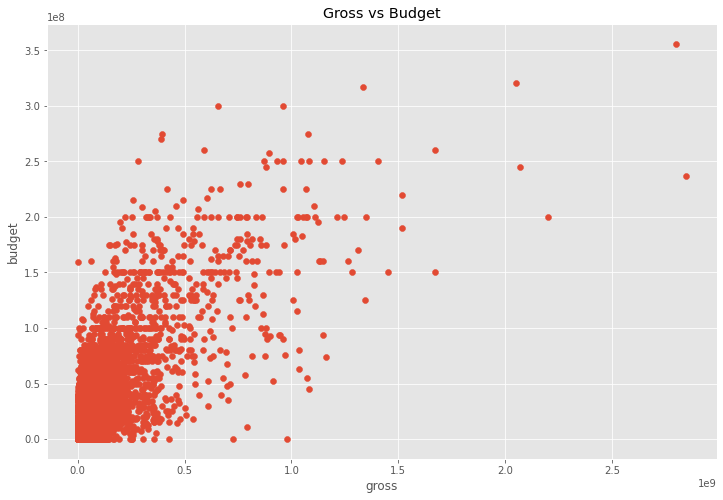

In [31]:
#finding correleation

plt.figure(figsize = (12,8))

plt.scatter(x = df['gross'], y = df['budget'])
plt.title('Gross vs Budget')
plt.xlabel('gross')
plt.ylabel('budget')

<AxesSubplot:xlabel='gross', ylabel='budget'>

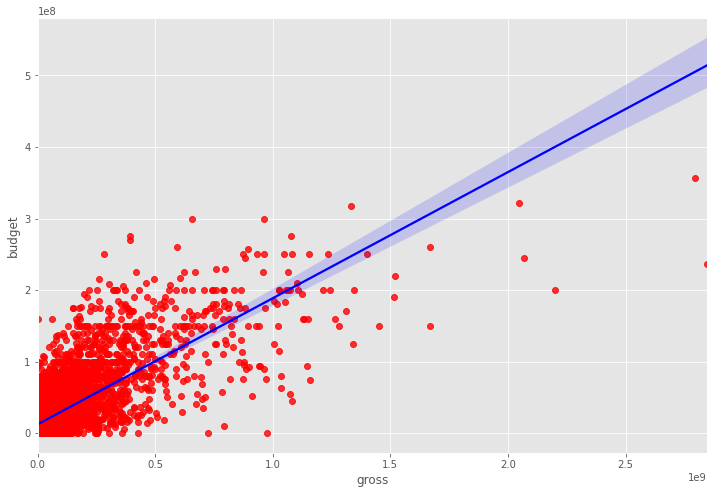

In [38]:
#plot with seaborn

plt.figure(figsize = (12,8))

sns.regplot(data = df, x = 'gross', y = 'budget', scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})

In [39]:
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.314842,0.264716,0.120676
score,0.102346,1.000000,0.411931,0.056781,0.188259,0.400574
votes,0.226895,0.411931,1.000000,0.485301,0.632987,0.309366
budget,0.314842,0.056781,0.485301,1.000000,0.750562,0.270042
gross,0.264716,0.188259,0.632987,0.750562,1.000000,0.244942
runtime,0.120676,0.400574,0.309366,0.270042,0.244942,1.000000


Text(87.0, 0.5, 'Movie features')

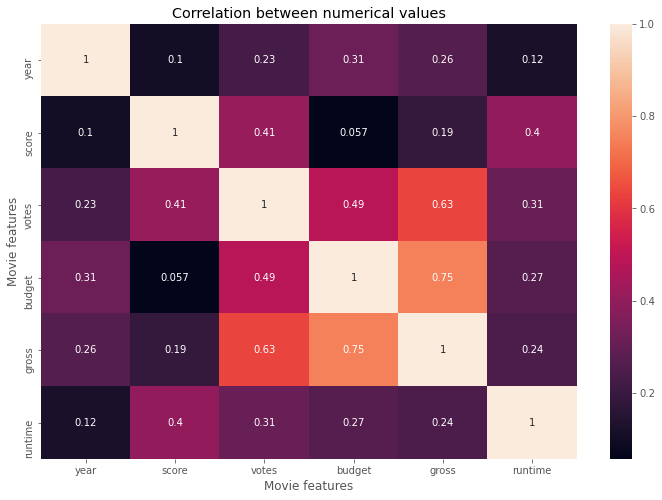

In [44]:
corr_matrix = df.corr(method = 'pearson')

plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation between numerical values')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

In [56]:
#converting the non-numerical cols to numeric to find correlation

df_numerized = df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,527,5,0,2009,688,7.8,1100000,1137,1756,2283,55,237000000,2847246203,2208,162.0,29
7445,529,5,0,2019,180,8.4,903000,160,729,2192,55,356000000,2797501328,1571,181.0,39
3045,6811,5,6,1997,696,7.8,1100000,1137,1756,1560,55,200000000,2201647264,2208,194.0,17
6663,5075,5,0,2015,690,7.8,876000,1107,2518,508,55,245000000,2069521700,1505,138.0,35
7244,530,5,0,2018,189,8.4,897000,160,729,2192,55,321000000,2048359754,1571,149.0,38


Text(86.59375, 0.5, 'Movie features')

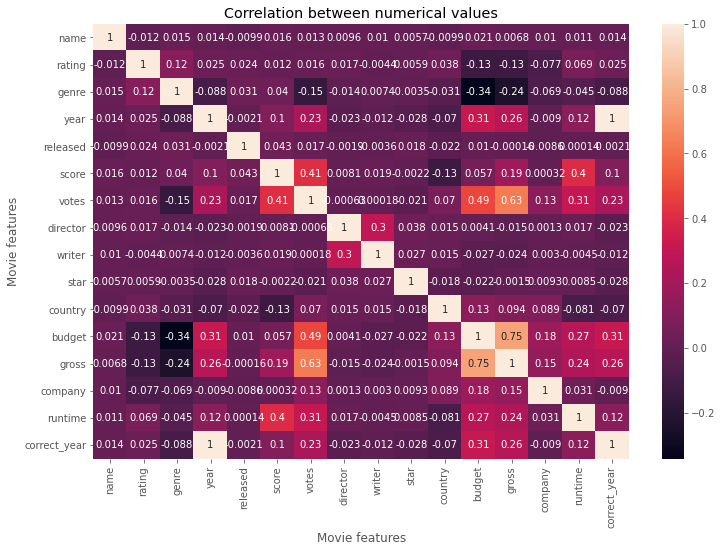

In [47]:
corr_matrix = df_numerized.corr(method = 'pearson')

plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation between numerical values')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

In [52]:
#lets make this heatmap easier to look at

corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.011924
              genre           0.015300
              year            0.013514
              released       -0.009906
                                ...   
correct_year  budget          0.314842
              gross           0.264716
              company        -0.009026
              runtime         0.120676
              correct_year    1.000000
Length: 256, dtype: float64

In [53]:
pairs_sorted = corr_pairs.sort_values()
pairs_sorted

budget        genre          -0.342064
genre         budget         -0.342064
              gross          -0.240903
gross         genre          -0.240903
votes         genre          -0.148420
                                ...   
gross         gross           1.000000
director      director        1.000000
correct_year  correct_year    1.000000
              year            1.000000
year          correct_year    1.000000
Length: 256, dtype: float64

In [54]:
high_corrs = pairs_sorted[(pairs_sorted) > 0.5]
high_corrs

votes         gross           0.632987
gross         votes           0.632987
budget        gross           0.750562
gross         budget          0.750562
name          name            1.000000
company       company         1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
score         score           1.000000
runtime       runtime         1.000000
votes         votes           1.000000
writer        writer          1.000000
star          star            1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
director      director        1.000000
correct_year  correct_year    1.000000
              year            1.000000
year          correct_year    1.000000
dtype: float64

In [55]:
 #Votes and Budget has the highest correlation to Gross earnings